In [1]:
import matplotlib.pyplot as plt

from sympy import symbols, Function, integrate
from sympy.interactive import printing

In [2]:
printing.init_printing()
_x_, _y_, _z_, _h_ = symbols('x y z h')
_a_, _b_, _k_, _m_, _n_ = symbols('a b k m n', integer=True)
_f_, _g_ = map(Function, 'fg')

In [5]:
printing.init_printing()
x, _y_, _z_, _h_ = symbols('x y z h')
_a_, _b_, _k_, _m_, _n_ = symbols('a b k m n', integer=True)
_f_, _g_ = map(Function, 'fg')

# Soma de Riemann

A soma de Riemann para a função $f(x)$ no intervalo $[a,b]$ com $n$ subintervalos pode ser escrita como

$$S_n = \sum_{i=1}^n f(x_i)\Delta x$$
$$\Delta x = \frac{(b-a)}{n}$$

Onde

- $x_i$ é um ponto qualquer no $i$-ésimo subintervalo (i.e a altura de cada pequeno retângulo); 
- $\Delta x$ é o comprimento de cada subintervalo (i.e o comprimento de cada pequeno retângulo);

Também expresso como

$$S_n = \sum_{i=1}^n \frac{(b-a)}{n}f(x_i)$$
$$\int_{a}^{b} f(x) dx = \lim_{n \rightarrow \infty} \sum_{i=1}^n \frac{(b-a)}{n}f(x_i)$$

Onde 

$$\frac{(b-a)}{n}$$

representa o comprimento da base e $f(x_i)$ a altura de cada retângulo.

Também pode ser expressa pelo limite

$$\int_{a}^{b} f(x) dx = \lim_{\Delta x \rightarrow 0} \sum_{i=1}^n \Delta x f(x_i)$$

**Exemplo**

Obtendo uma aproximação utilizando a soma de Riemann para a integral definida da função abaixo

$$f(x) = x^2$$
$$\int_{2}^{3} x^2$$

In [10]:
def riemann_sum(f, a, b, n):
    h = (b-a) / n
    return sum([f(a + k*h) * h for k in range(1,n+1)])

In [11]:
# calculated area
print(riemann_sum(
    f=lambda x: x**2, 
    a=2, 
    b=3, 
    n=800
))

6.336458593750002


Agora comparando com o valor obtido através da integração de $x^2$ no intervalo $[a,b]$

In [12]:
integrate(_x_**2, (_x_, 3, 2))

In [13]:
-19/3

Pode-se ainda calcular a integral desta outra maneira

In [14]:
integrate(_x_**2, (_x_, _a_, _b_))

In [15]:
a = 2
b = 3

(b**3/3) - (a**3/3)

## Visualizando os valores aproximados ao longo do número $n$ de retângulos

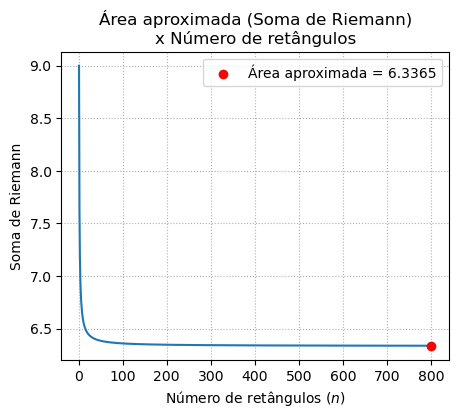

In [16]:
n_rectangles = 800

N = range(1,n_rectangles+1)
Y = [riemann_sum(f=lambda x: x**2, a=2, b=3, n=n) for n in N]

plt.figure(figsize=(5,4));
plt.title('Área aproximada (Soma de Riemann)\nx Número de retângulos');
plt.xlabel('Número de retângulos ($n$)');
plt.ylabel('Soma de Riemann');
plt.grid(linestyle=':');

plt.plot(N, Y);

plt.scatter(
    N[-1], Y[-1], 
    zorder=3, 
    color='r', 
    label=f'Área aproximada = {round(Y[-1], 4)}'
);

plt.legend();